In [1]:
from cvxopt import matrix, spmatrix, normal, setseed, blas, lapack, solvers
import nucnrm
import numpy as np
from tqdm import tqdm

In [3]:
n = 20
num_iteration = 5
results = np.zeros((n,n**2))
for i in tqdm(range(n)):
    for j in range(n**2):
        for k in range(num_iteration):
            r = i
            m = j
            C = np.random.randn(n,r)
            D = np.random.randn(r,n)
            M = np.dot(C,D)

            Op = np.random.choice(n*n,m,replace =False)
            nOp = np.setdiff1d(range(n*n),Op)

            B = np.zeros(n*n)
            B[Op] = M.reshape(-1)[Op]
            B = matrix(B,(n,n))
            A = spmatrix(1.0,nOp,range(n*n-m),size=(n*n,n*n-m ))

            sol = nucnrm.nrmapp(A, B)

            x = sol['x']
            Z = sol['Z']
            X = matrix(A *x, (n, n)) + B
            if np.linalg.norm(X.T-M)/np.linalg.norm(M)< 1e-3:
                results[i,j] += 1/num_iteration
            del A , B, X, Z
            


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]<ipython-input-3-2a9a1c87874f>:26: RuntimeWarning: invalid value encountered in double_scalars
  if np.linalg.norm(X.T-M)/np.linalg.norm(M)< 1e-3:
100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [49:12<00:00, 147.62s/it]


Text(0, 0.5, 'd_r/m')

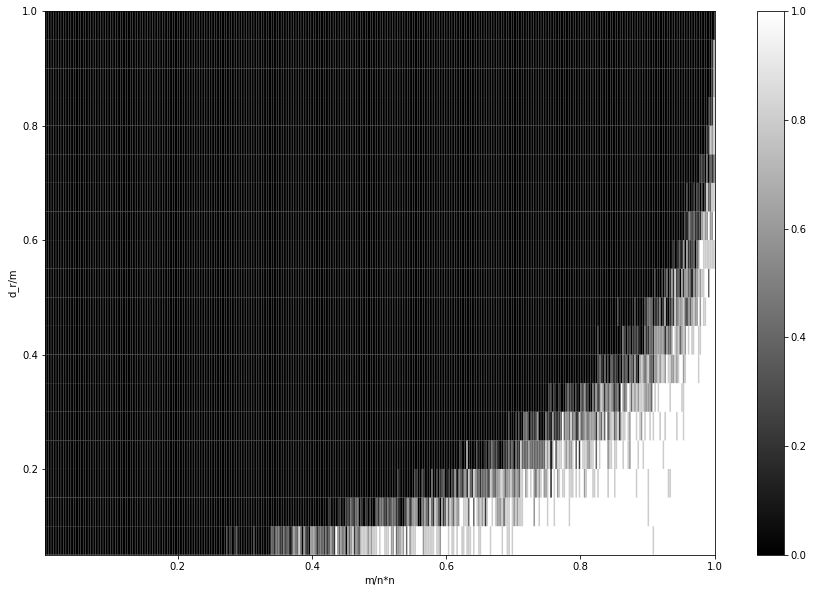

In [48]:
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(1,21)/20
y = np.arange(1,20*20+1)/400
X,Y = np.meshgrid(y,x)
im = ax.pcolormesh(X,Y,results[1:,1:], cmap=cm.gray, edgecolors='white', linewidths=0,
                   antialiased=True)
fig.colorbar(im)
plt.xlabel('m/n*n')
plt.ylabel('d_r/m')